just a record for future tasks

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta

% matplotlib inline

UsageError: Line magic function `%` not found.


In [34]:
jobs = pd.read_excel('DataSource_NZSeek/NZ_Admin_JOBS.xlsx', header=None, skiprows=1)

In [35]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708 entries, 0 to 2707
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2708 non-null   object
 1   1       2708 non-null   object
 2   2       2686 non-null   object
 3   3       2708 non-null   object
 4   4       2708 non-null   object
 5   5       2708 non-null   object
dtypes: object(6)
memory usage: 127.1+ KB


In [36]:
jobs.describe()

,0,1,2,3,4,5
count,2708,2708,2686,2708,2708,2708
unique,548,2708,475,147,54,93
top,Executive Assistant,https://www.seek.co.nz/job/50582301?type=promo...,Beyond Recruitment - Winner – Best Innovation ...,location: AucklandAucklandarea: Auckland Centr...,"27d ago,at",classification: Administration & Office Suppor...
freq,301,1,285,654,572,715


In [37]:
jobs.head()

,0,1,2,3,4,5
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,NaN,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,NaN,location: CanterburyCanterburyarea: Christchur...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...


In [39]:
jobs.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
dtype: object

In [40]:
jobs.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [41]:
jobs.columns = ['Name', 'Link', 'Department', 'LocationArea', 'ReleaseTime', 'Classification']

In [42]:
jobs

,Name,Link,Department,LocationArea,ReleaseTime,Classification
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,NaN,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,NaN,location: CanterburyCanterburyarea: Christchur...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...
2703,Key Account Manager,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,location: AucklandAucklandarea: Auckland Centr...,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,location: WellingtonWellingtonarea: Wellington...,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"28d ago,at",Competitive hourly rates $$


### 首先处理第一列

In [43]:
jobs_name = jobs.Name

jobs_name

0                              Administrator
1                               Receptionist
2               Prosecutions Support Officer
3       Early Childhood Centre Administrator
4             Business Support Administrator
                        ...                 
2703                     Key Account Manager
2704                     Executive Assistant
2705                  Temporary Office Roles
2706                  Temporary Office Roles
2707                     Executive Assistant
Name: Name, Length: 2708, dtype: object

In [44]:
jobs_name_has_missing = jobs_name.isnull().any()
jobs_name_has_missing

False

In [45]:
jobs_name = jobs_name.str.title()

jobs_name

0                              Administrator
1                               Receptionist
2               Prosecutions Support Officer
3       Early Childhood Centre Administrator
4             Business Support Administrator
                        ...                 
2703                     Key Account Manager
2704                     Executive Assistant
2705                  Temporary Office Roles
2706                  Temporary Office Roles
2707                     Executive Assistant
Name: Name, Length: 2708, dtype: object

In [46]:
jobs_name.describe()

count                    2708
unique                    543
top       Executive Assistant
freq                      302
Name: Name, dtype: object

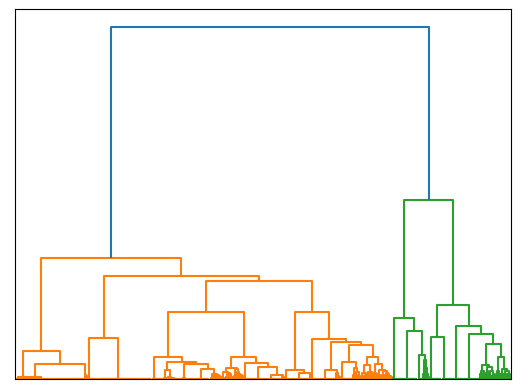

In [47]:
from Levenshtein import distance
from scipy.cluster.hierarchy import linkage, dendrogram

# 计算编辑距离矩阵
distances = [[distance(s1, s2) if i != j else 1 for i, s1 in enumerate(jobs_name)] for j, s2 in enumerate(jobs_name)]

# 进行聚类
linkage_matrix = linkage(distances, 'ward')

# 可视化聚类结果
dendrogram(linkage_matrix)

plt.xticks([])
plt.yticks([])

# plt.xlabel('')
# plt.ylabel('')
plt.show()

发现对jobs_name聚类并没有什么意义，因此jobs_name列preprocess完成，重新赋值到原jobs df中

In [48]:
jobs.Name = jobs_name

jobs

,Name,Link,Department,LocationArea,ReleaseTime,Classification
0,Administrator,https://www.seek.co.nz/job/50582301?type=promo...,NaN,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,https://www.seek.co.nz/job/50622432?type=stand...,NaN,location: CanterburyCanterburyarea: Christchur...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...
2703,Key Account Manager,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,location: AucklandAucklandarea: Auckland Centr...,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,location: WellingtonWellingtonarea: Wellington...,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"28d ago,at",Competitive hourly rates $$


### 接下来对Link列进行处理
观察发现，Link列中包含的有用信息为job_id和type，因此我们使用正则提取

In [49]:
jobs_link = jobs.Link
jobs_link

0       https://www.seek.co.nz/job/50582301?type=promo...
1       https://www.seek.co.nz/job/50620889?type=promo...
2       https://www.seek.co.nz/job/50622169?type=stand...
3       https://www.seek.co.nz/job/50639620?type=stand...
4       https://www.seek.co.nz/job/50622432?type=stand...
                              ...                        
2703    https://www.seek.co.nz/job/50490062?type=stand...
2704    https://www.seek.co.nz/job/50488000?type=stand...
2705    https://www.seek.co.nz/job/50524865?type=stand...
2706    https://www.seek.co.nz/job/50477118?type=stand...
2707    https://www.seek.co.nz/job/50496571?type=stand...
Name: Link, Length: 2708, dtype: object

In [50]:
jobs_id = jobs_link.apply(lambda x: re.search(r'\d+', x).group())
jobs_id

0       50582301
1       50620889
2       50622169
3       50639620
4       50622432
          ...   
2703    50490062
2704    50488000
2705    50524865
2706    50477118
2707    50496571
Name: Link, Length: 2708, dtype: object

In [51]:
jobs_type = jobs_link.apply(lambda x: re.search(r'type=(\w+)', x).group(1))
jobs_type

0       promoted
1       promoted
2       standard
3       standard
4       standout
          ...   
2703    standout
2704    standout
2705    standout
2706    standout
2707    standout
Name: Link, Length: 2708, dtype: object

In [52]:
jobs_type.describe()

count         2708
unique           3
top       standout
freq          1877
Name: Link, dtype: object

In [53]:
jobs.insert(jobs.columns.get_loc('Link'), 'JobId', jobs_id)

In [54]:
jobs

,Name,JobId,Link,Department,LocationArea,ReleaseTime,Classification
0,Administrator,50582301,https://www.seek.co.nz/job/50582301?type=promo...,NaN,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,50620889,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,50622169,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,50639620,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,50622432,https://www.seek.co.nz/job/50622432?type=stand...,NaN,location: CanterburyCanterburyarea: Christchur...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...
2703,Key Account Manager,50490062,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,location: AucklandAucklandarea: Auckland Centr...,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,50488000,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,location: WellingtonWellingtonarea: Wellington...,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,50524865,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,50477118,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"28d ago,at",Competitive hourly rates $$


In [55]:
jobs.insert(jobs.columns.get_loc('Link'), 'JobType', jobs_type)

In [56]:
jobs

,Name,JobId,JobType,Link,Department,LocationArea,ReleaseTime,Classification
0,Administrator,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,location: Bay of PlentyBay of Plentyarea: Taur...,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,location: AucklandAuckland,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,location: SouthlandSouthlandarea: Invercargill...,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,location: CanterburyCanterburyarea: Christchur...,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...
2703,Key Account Manager,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,location: AucklandAucklandarea: Auckland Centr...,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,location: WellingtonWellingtonarea: Wellington...,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,location: WaikatoWaikatoarea: HamiltonHamilton...,"28d ago,at",Competitive hourly rates $$


### Link列处理完毕，接下来处理Location列
因为Department列中空值信息可能会从Location列中获取，因此先处理Location列

In [58]:
jobs_location_area = jobs.LocationArea

In [59]:
jobs_location_area

0       location: Bay of PlentyBay of Plentyarea: Taur...
1       location: Bay of PlentyBay of Plentyarea: Taur...
2                              location: AucklandAuckland
3       location: SouthlandSouthlandarea: Invercargill...
4       location: CanterburyCanterburyarea: Christchur...
                              ...                        
2703    location: AucklandAucklandarea: Auckland Centr...
2704    location: WellingtonWellingtonarea: Wellington...
2705    location: WaikatoWaikatoarea: HamiltonHamilton...
2706    location: WaikatoWaikatoarea: HamiltonHamilton...
2707                       location: WellingtonWellington
Name: LocationArea, Length: 2708, dtype: object

In [60]:
jobs_location_area[jobs_location_area.str.contains('area')]

0       location: Bay of PlentyBay of Plentyarea: Taur...
1       location: Bay of PlentyBay of Plentyarea: Taur...
3       location: SouthlandSouthlandarea: Invercargill...
4       location: CanterburyCanterburyarea: Christchur...
5       location: NorthlandNorthlandarea: WhangareiWha...
                              ...                        
2702    location: WaikatoWaikatoarea: Rest of WaikatoR...
2703    location: AucklandAucklandarea: Auckland Centr...
2704    location: WellingtonWellingtonarea: Wellington...
2705    location: WaikatoWaikatoarea: HamiltonHamilton...
2706    location: WaikatoWaikatoarea: HamiltonHamilton...
Name: LocationArea, Length: 2167, dtype: object

In [61]:
has_area = jobs_location_area.str.contains('area')

has_area

0        True
1        True
2       False
3        True
4        True
        ...  
2703     True
2704     True
2705     True
2706     True
2707    False
Name: LocationArea, Length: 2708, dtype: bool

In [71]:
jobs_location_area = pd.DataFrame(jobs_location_area)

In [93]:
jobs_location_area = jobs_location_area.assign(
    Location=(jobs_location_area.LocationArea.str.split('area: ').str[0]),
    Area=jobs_location_area.LocationArea.str.split('area: ').str[1])

jobs_location_area['Area'] = jobs_location_area['Area'].fillna(value=np.nan)

In [92]:
# jobs_location_area = jobs_location_area.drop(columns='Location')
# jobs_location_area = jobs_location_area.drop(columns='Area')

In [94]:
jobs_location_area.Location

0       location: Bay of PlentyBay of Plenty
1       location: Bay of PlentyBay of Plenty
2                 location: AucklandAuckland
3               location: SouthlandSouthland
4             location: CanterburyCanterbury
                        ...                 
2703              location: AucklandAuckland
2704          location: WellingtonWellington
2705                location: WaikatoWaikato
2706                location: WaikatoWaikato
2707          location: WellingtonWellington
Name: Location, Length: 2708, dtype: object

In [97]:
jobs_location_area.Location = jobs_location_area.Location.str.replace('location: ', '', )

现在来处理字符串重复的问题，观察发现，字符串的重复没有什么特殊性，都是子串*2，因此我们对字符串从中间进行split，新生成两列df，判断是否一致，一致则保留一列的数据到原df上，不一致则不进行修改

In [154]:
jobs_location_area['Location_1'] = jobs_location_area['Location'].apply(lambda x: x[:len(x) // 2])
jobs_location_area['Location_2'] = jobs_location_area['Location'].apply(lambda x: x[len(x) // 2:])

In [160]:
jobs_location_area['Location_2'] = jobs_location_area['Location_2'].apply(lambda x: x[:-1] if x[-1] == ' ' else x)

In [161]:
jobs_location_area

,LocationArea,Location,Area,Location_1,Location_2
0,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of PlentyBay of Plenty,TaurangaTauranga,Bay of Plenty,Bay of Plenty
1,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of PlentyBay of Plenty,TaurangaTauranga,Bay of Plenty,Bay of Plenty
2,location: AucklandAuckland,AucklandAuckland,NaN,Auckland,Auckland
3,location: SouthlandSouthlandarea: Invercargill...,SouthlandSouthland,InvercargillInvercargill,Southland,Southland
4,location: CanterburyCanterburyarea: Christchur...,CanterburyCanterbury,ChristchurchChristchurch,Canterbury,Canterbury
...,...,...,...,...,...
2703,location: AucklandAucklandarea: Auckland Centr...,AucklandAuckland,Auckland CentralAuckland Central,Auckland,Auckland
2704,location: WellingtonWellingtonarea: Wellington...,WellingtonWellington,"Wellington CentralWellington Central,Competiti...",Wellington,Wellington
2705,location: WaikatoWaikatoarea: HamiltonHamilton...,WaikatoWaikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato
2706,location: WaikatoWaikatoarea: HamiltonHamilton...,WaikatoWaikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato


In [162]:
jobs_location_area['Location'] = np.where(
    jobs_location_area['Location_1'] == jobs_location_area['Location_2'],
    jobs_location_area['Location_1'],
    jobs_location_area['Location']
)

In [163]:
jobs_location_area

,LocationArea,Location,Area,Location_1,Location_2
0,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of Plenty,TaurangaTauranga,Bay of Plenty,Bay of Plenty
1,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of Plenty,TaurangaTauranga,Bay of Plenty,Bay of Plenty
2,location: AucklandAuckland,Auckland,NaN,Auckland,Auckland
3,location: SouthlandSouthlandarea: Invercargill...,Southland,InvercargillInvercargill,Southland,Southland
4,location: CanterburyCanterburyarea: Christchur...,Canterbury,ChristchurchChristchurch,Canterbury,Canterbury
...,...,...,...,...,...
2703,location: AucklandAucklandarea: Auckland Centr...,Auckland,Auckland CentralAuckland Central,Auckland,Auckland
2704,location: WellingtonWellingtonarea: Wellington...,Wellington,"Wellington CentralWellington Central,Competiti...",Wellington,Wellington
2705,location: WaikatoWaikatoarea: HamiltonHamilton...,Waikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato
2706,location: WaikatoWaikatoarea: HamiltonHamilton...,Waikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato


In [168]:
jobs_location_area['Area_1'] = jobs_location_area['Area'].apply(lambda x: x[:len(x) // 2] if pd.notnull(x) else x)
jobs_location_area['Area_2'] = jobs_location_area['Area'].apply(lambda x: x[len(x) // 2:] if pd.notnull(x) else x)

In [169]:
jobs_location_area

,LocationArea,Location,Area,Location_1,Location_2,Area_1,Area_2
0,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of Plenty,TaurangaTauranga,Bay of Plenty,Bay of Plenty,Tauranga,Tauranga
1,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of Plenty,TaurangaTauranga,Bay of Plenty,Bay of Plenty,Tauranga,Tauranga
2,location: AucklandAuckland,Auckland,NaN,Auckland,Auckland,NaN,NaN
3,location: SouthlandSouthlandarea: Invercargill...,Southland,InvercargillInvercargill,Southland,Southland,Invercargill,Invercargill
4,location: CanterburyCanterburyarea: Christchur...,Canterbury,ChristchurchChristchurch,Canterbury,Canterbury,Christchurch,Christchurch
...,...,...,...,...,...,...,...
2703,location: AucklandAucklandarea: Auckland Centr...,Auckland,Auckland CentralAuckland Central,Auckland,Auckland,Auckland Central,Auckland Central
2704,location: WellingtonWellingtonarea: Wellington...,Wellington,"Wellington CentralWellington Central,Competiti...",Wellington,Wellington,Wellington CentralWellington C,"entral,Competitive hourly rate"
2705,location: WaikatoWaikatoarea: HamiltonHamilton...,Waikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato,"HamiltonHamilton,Compe",titive hourly rates $$
2706,location: WaikatoWaikatoarea: HamiltonHamilton...,Waikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato,"HamiltonHamilton,Compe",titive hourly rates $$


In [170]:
jobs_location_area['Area'] = np.where(
    jobs_location_area['Area_1'] == jobs_location_area['Area_2'],
    jobs_location_area['Area_1'],
    jobs_location_area['Area']
)

In [171]:
jobs_location_area

,LocationArea,Location,Area,Location_1,Location_2,Area_1,Area_2
0,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of Plenty,Tauranga,Bay of Plenty,Bay of Plenty,Tauranga,Tauranga
1,location: Bay of PlentyBay of Plentyarea: Taur...,Bay of Plenty,Tauranga,Bay of Plenty,Bay of Plenty,Tauranga,Tauranga
2,location: AucklandAuckland,Auckland,NaN,Auckland,Auckland,NaN,NaN
3,location: SouthlandSouthlandarea: Invercargill...,Southland,Invercargill,Southland,Southland,Invercargill,Invercargill
4,location: CanterburyCanterburyarea: Christchur...,Canterbury,Christchurch,Canterbury,Canterbury,Christchurch,Christchurch
...,...,...,...,...,...,...,...
2703,location: AucklandAucklandarea: Auckland Centr...,Auckland,Auckland Central,Auckland,Auckland,Auckland Central,Auckland Central
2704,location: WellingtonWellingtonarea: Wellington...,Wellington,"Wellington CentralWellington Central,Competiti...",Wellington,Wellington,Wellington CentralWellington C,"entral,Competitive hourly rate"
2705,location: WaikatoWaikatoarea: HamiltonHamilton...,Waikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato,"HamiltonHamilton,Compe",titive hourly rates $$
2706,location: WaikatoWaikatoarea: HamiltonHamilton...,Waikato,"HamiltonHamilton,Competitive hourly rates $$",Waikato,Waikato,"HamiltonHamilton,Compe",titive hourly rates $$


In [180]:
jobs.insert(jobs.columns.get_loc('LocationArea'), 'Location', jobs_location_area.Location)
jobs.insert(jobs.columns.get_loc('LocationArea'), 'Area', jobs_location_area.Area)

,Name,Location,Area,JobId,JobType,Link,Department,ReleaseTime,Classification
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,"28d ago,at",Competitive hourly rates $$


In [184]:
jobs = jobs.drop(columns='LocationArea')

KeyError: "['LocationArea'] not found in axis"

In [185]:
jobs

,Name,Location,Area,JobId,JobType,Link,Department,ReleaseTime,Classification
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,"28d ago,at",Competitive hourly rates $$


### 接下来我们先处理ReleaseTime

In [190]:
release_time = pd.DataFrame(jobs.ReleaseTime)

In [193]:
release_time['ReleaseTime'].str.contains('at').all()

True

In [194]:
release_time['PrivateAdvertiser'] = release_time['ReleaseTime'].apply(lambda x: 1 if 'Private Advertiser' in x else 0)

In [195]:
release_time

,ReleaseTime,PrivateAdvertiser
0,"Featured,at,Private Advertiser",1
1,"Featured,at",0
2,"4d ago,at",0
3,"1h ago,at",0
4,"4d ago,at,Private Advertiser",1
...,...,...
2703,"27d ago,at",0
2704,"27d ago,at",0
2705,"20d ago,at",0
2706,"28d ago,at",0


In [203]:
re.search(r'(\d+)\s*([a-z]+)', "4d ago,at").group(2)

'd'

In [204]:
release_time['ReleaseTime'].apply(
    lambda x: re.search(r'(\d+)\s*([a-z]+)', x).group(2) if re.search(r'(\d+)\s*([a-z]+)',
                                                                      x) else np.nan).value_counts()

d    2672
h      11
m       5
Name: ReleaseTime, dtype: int64

In [207]:
def datetime_cal(time_str):
    time_match = re.search(r'(\d+)\s*([a-z]+)', time_str)
    if not time_match:
        return np.nan

    time_value = int(time_match.group(1))
    time_unit = time_match.group(2)

    if time_unit == 'd':
        datetime = pd.to_datetime('today') - timedelta(days=time_value)
    elif time_unit == 'h':
        datetime = pd.to_datetime('today') - timedelta(hours=time_value)
    elif time_unit == 'm':
        datetime = pd.to_datetime('today') - timedelta(minutes=time_value)
    else:
        return np.nan

    return datetime.strftime('%Y-%m-%d %H:%M')


In [209]:
release_time['Datetime'] = release_time['ReleaseTime'].apply(datetime_cal)

In [210]:
release_time

,ReleaseTime,PrivateAdvertiser,Datetime
0,"Featured,at,Private Advertiser",1,NaN
1,"Featured,at",0,NaN
2,"4d ago,at",0,2022-12-20 16:59
3,"1h ago,at",0,2022-12-24 15:59
4,"4d ago,at,Private Advertiser",1,2022-12-20 16:59
...,...,...,...
2703,"27d ago,at",0,2022-11-27 16:59
2704,"27d ago,at",0,2022-11-27 16:59
2705,"20d ago,at",0,2022-12-04 16:59
2706,"28d ago,at",0,2022-11-26 16:59


In [211]:
release_time['Featured'] = release_time['ReleaseTime'].apply(lambda x: 1 if 'Featured' in x else 0)

In [212]:
release_time

,ReleaseTime,PrivateAdvertiser,Datetime,Featured
0,"Featured,at,Private Advertiser",1,NaN,1
1,"Featured,at",0,NaN,1
2,"4d ago,at",0,2022-12-20 16:59,0
3,"1h ago,at",0,2022-12-24 15:59,0
4,"4d ago,at,Private Advertiser",1,2022-12-20 16:59,0
...,...,...,...,...
2703,"27d ago,at",0,2022-11-27 16:59,0
2704,"27d ago,at",0,2022-11-27 16:59,0
2705,"20d ago,at",0,2022-12-04 16:59,0
2706,"28d ago,at",0,2022-11-26 16:59,0


In [213]:
jobs

,Name,Location,Area,JobId,JobType,Link,Department,ReleaseTime,Classification
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,"28d ago,at",Competitive hourly rates $$


In [214]:
jobs.insert(jobs.columns.get_loc('ReleaseTime'), 'PrivateAdvertiser', release_time.PrivateAdvertiser)
jobs.insert(jobs.columns.get_loc('ReleaseTime'), 'Featured', release_time.Featured)
jobs.insert(jobs.columns.get_loc('ReleaseTime'), 'Datetime', release_time.Datetime)

In [215]:
jobs

,Name,Location,Area,JobId,JobType,Link,Department,PrivateAdvertiser,Featured,Datetime,ReleaseTime,Classification
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,1,1,NaN,"Featured,at,Private Advertiser",classification: Administration & Office Suppor...
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,0,1,NaN,"Featured,at",classification: Administration & Office Suppor...
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,0,0,2022-12-20 16:59,"4d ago,at",classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,0,0,2022-12-24 15:59,"1h ago,at",classification: Administration & Office Suppor...
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,1,0,2022-12-20 16:59,"4d ago,at,Private Advertiser",classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,0,0,2022-11-27 16:59,"27d ago,at",classification: Administration & Office Suppor...
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,0,0,2022-11-27 16:59,"27d ago,at",Competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,0,0,2022-12-04 16:59,"20d ago,at",Competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,0,0,2022-11-26 16:59,"28d ago,at",Competitive hourly rates $$


In [217]:
jobs = jobs.drop(columns='ReleaseTime')

In [218]:
jobs

,Name,Location,Area,JobId,JobType,Link,Department,PrivateAdvertiser,Featured,Datetime,Classification
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,1,1,NaN,classification: Administration & Office Suppor...
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,0,1,NaN,classification: Administration & Office Suppor...
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,0,0,2022-12-20 16:59,classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,0,0,2022-12-24 15:59,classification: Administration & Office Suppor...
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,1,0,2022-12-20 16:59,classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,0,0,2022-11-27 16:59,classification: Administration & Office Suppor...
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,0,0,2022-11-27 16:59,Competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,0,0,2022-12-04 16:59,Competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,0,0,2022-11-26 16:59,Competitive hourly rates $$


### Time相关的处理完毕，接下来处理Classification

In [220]:
cls = pd.DataFrame(jobs.Classification)
cls

,Classification
0,classification: Administration & Office Suppor...
1,classification: Administration & Office Suppor...
2,classification: Administration & Office Suppor...
3,classification: Administration & Office Suppor...
4,classification: Administration & Office Suppor...
...,...
2703,classification: Administration & Office Suppor...
2704,Competitive hourly rate
2705,Competitive hourly rates $$
2706,Competitive hourly rates $$


In [222]:
cls['Classification'].str.contains('classification').all()

False

In [223]:
cls['Classification'].str.contains('subClassification').all()

False

In [226]:
test = cls['Classification'].apply(lambda x: x[:14])

In [227]:
test

0       classification
1       classification
2       classification
3       classification
4       classification
             ...      
2703    classification
2704    Competitive ho
2705    Competitive ho
2706    Competitive ho
2707    classification
Name: Classification, Length: 2708, dtype: object

In [228]:
test.describe()

count               2708
unique                79
top       classification
freq                2105
Name: Classification, dtype: object

In [229]:
test.info

<bound method Series.info of 0       classification
1       classification
2       classification
3       classification
4       classification
             ...      
2703    classification
2704    Competitive ho
2705    Competitive ho
2706    Competitive ho
2707    classification
Name: Classification, Length: 2708, dtype: object>

In [231]:
cls['Classification'] = cls['Classification'].apply(lambda x: x.lower())
cls

,Classification
0,classification: administration & office suppor...
1,classification: administration & office suppor...
2,classification: administration & office suppor...
3,classification: administration & office suppor...
4,classification: administration & office suppor...
...,...
2703,classification: administration & office suppor...
2704,competitive hourly rate
2705,competitive hourly rates $$
2706,competitive hourly rates $$


In [237]:
cls[["class", "subclass"]] = cls["Classification"].str.extract(r"classification: (.*)subclassification: (.*)")

# 将新列赋值为 NaN，如果原来的列没有匹配项
cls["class"].fillna(value=np.nan, inplace=True)
cls["subclass"].fillna(value=np.nan, inplace=True)

                                         Classification  cls_subcls  \
0     classification: administration & office suppor...         NaN   
1     classification: administration & office suppor...         NaN   
2     classification: administration & office suppor...         NaN   
3     classification: administration & office suppor...         NaN   
4     classification: administration & office suppor...         NaN   
...                                                 ...         ...   
2703  classification: administration & office suppor...         NaN   
2704                            competitive hourly rate         NaN   
2705                        competitive hourly rates $$         NaN   
2706                        competitive hourly rates $$         NaN   
2707  classification: administration & office suppor...         NaN   

                                                  class  \
0     administration & office supportadministration ...   
1     administration & office

In [241]:
cls["Classification"].str.contains(r"classification: (.*)subclassification: (.*)")

/var/folders/kb/y3v1ngq94_l3715rqgy7fttw0000gn/T/ipykernel_93619/2264536357.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cls["Classification"].str.contains(r"classification: (.*)subclassification: (.*)")


0        True
1        True
2        True
3        True
4        True
        ...  
2703     True
2704    False
2705    False
2706    False
2707     True
Name: Classification, Length: 2708, dtype: bool

In [245]:
cls['Classification'] = cls["Classification"].apply(
    lambda x: 'done' if re.search(r"classification: (.*)subclassification: (.*)", x) else x)

In [246]:
cls

,Classification,class,subclass
0,done,administration & office supportadministration ...,office managementoffice management
1,done,administration & office supportadministration ...,receptionistsreceptionists
2,done,administration & office supportadministration ...,otherother
3,done,administration & office supportadministration ...,administrative assistantsadministrative assist...
4,done,administration & office supportadministration ...,client & sales administrationclient & sales ad...
...,...,...,...
2703,done,administration & office supportadministration ...,client & sales administrationclient & sales ad...
2704,competitive hourly rate,NaN,NaN
2705,competitive hourly rates $$,NaN,NaN
2706,competitive hourly rates $$,NaN,NaN


In [247]:
cls['Classification'].isnull().any()

False

In [248]:
cls['Classification'] = cls["Classification"].apply(lambda x: np.nan if x == "done" else x)

In [250]:
cls

,Classification,class,subclass
0,NaN,administration & office supportadministration ...,office managementoffice management
1,NaN,administration & office supportadministration ...,receptionistsreceptionists
2,NaN,administration & office supportadministration ...,otherother
3,NaN,administration & office supportadministration ...,administrative assistantsadministrative assist...
4,NaN,administration & office supportadministration ...,client & sales administrationclient & sales ad...
...,...,...,...
2703,NaN,administration & office supportadministration ...,client & sales administrationclient & sales ad...
2704,competitive hourly rate,NaN,NaN
2705,competitive hourly rates $$,NaN,NaN
2706,competitive hourly rates $$,NaN,NaN


In [256]:
# 用于检查class和subclass是否同时存在或者同时不存在，如果判断为真，之后处理class和subclass将会简单一些
((cls['class'].isnull() & cls['subclass'].isnull()) | (cls['class'].notnull() & cls['subclass'].notnull())).all()

True

In [270]:
def class_drop_duplicate(class_str):
    if class_str != np.nan:
        class_str = str(class_str)
        if class_str[-1] == " ":
            class_str = class_str.replace(class_str[-1], "")
        return class_str[:len(class_str) // 2] \
            if class_str[:len(class_str) // 2] == class_str[len(class_str) // 2:] \
            else class_str
    else:
        return class_str

In [271]:
cls['class'] = cls['class'].apply(class_drop_duplicate)

In [273]:
cls['subclass'] = cls['subclass'].apply(class_drop_duplicate)

In [274]:
cls

,Classification,class,subclass
0,NaN,administration & office support,office management
1,NaN,administration & office support,receptionists
2,NaN,administration & office support,other
3,NaN,administration & office support,administrative assistants
4,NaN,administration & office support,client & sales administration
...,...,...,...
2703,NaN,administration & office support,client & sales administration
2704,competitive hourly rate,nan,nan
2705,competitive hourly rates $$,nan,nan
2706,competitive hourly rates $$,nan,nan


In [275]:
jobs

,Name,Location,Area,JobId,JobType,Link,Department,PrivateAdvertiser,Featured,Datetime,Classification
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,1,1,NaN,classification: Administration & Office Suppor...
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,0,1,NaN,classification: Administration & Office Suppor...
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,0,0,2022-12-20 16:59,classification: Administration & Office Suppor...
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,0,0,2022-12-24 15:59,classification: Administration & Office Suppor...
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,1,0,2022-12-20 16:59,classification: Administration & Office Suppor...
...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,0,0,2022-11-27 16:59,classification: Administration & Office Suppor...
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,0,0,2022-11-27 16:59,Competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,0,0,2022-12-04 16:59,Competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,0,0,2022-11-26 16:59,Competitive hourly rates $$


In [276]:
jobs.insert(jobs.columns.get_loc('Classification'), 'Class', cls['class'])
jobs.insert(jobs.columns.get_loc('Classification'), 'Subclass', cls['subclass'])
jobs.insert(jobs.columns.get_loc('Classification'), 'Remark', cls['Classification'])

In [278]:
jobs = jobs.drop(columns = 'Classification')

In [279]:
jobs

,Name,Location,Area,JobId,JobType,Link,Department,PrivateAdvertiser,Featured,Datetime,Class,Subclass,Remark
0,Administrator,Bay of Plenty,Tauranga,50582301,promoted,https://www.seek.co.nz/job/50582301?type=promo...,NaN,1,1,NaN,administration & office support,office management,NaN
1,Receptionist,Bay of Plenty,Tauranga,50620889,promoted,https://www.seek.co.nz/job/50620889?type=promo...,Avenues Orthodontics,0,1,NaN,administration & office support,receptionists,NaN
2,Prosecutions Support Officer,Auckland,NaN,50622169,standard,https://www.seek.co.nz/job/50622169?type=stand...,New Zealand Police,0,0,2022-12-20 16:59,administration & office support,other,NaN
3,Early Childhood Centre Administrator,Southland,Invercargill,50639620,standard,https://www.seek.co.nz/job/50639620?type=stand...,Kew Pacific Island Early Learning Centre,0,0,2022-12-24 15:59,administration & office support,administrative assistants,NaN
4,Business Support Administrator,Canterbury,Christchurch,50622432,standout,https://www.seek.co.nz/job/50622432?type=stand...,NaN,1,0,2022-12-20 16:59,administration & office support,client & sales administration,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,Key Account Manager,Auckland,Auckland Central,50490062,standout,https://www.seek.co.nz/job/50490062?type=stand...,Hays Talent Solutions,0,0,2022-11-27 16:59,administration & office support,client & sales administration,NaN
2704,Executive Assistant,Wellington,"Wellington CentralWellington Central,Competiti...",50488000,standout,https://www.seek.co.nz/job/50488000?type=stand...,one eighty recruitment,0,0,2022-11-27 16:59,nan,nan,competitive hourly rate
2705,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50524865,standout,https://www.seek.co.nz/job/50524865?type=stand...,Asset Recruitment Ltd,0,0,2022-12-04 16:59,nan,nan,competitive hourly rates $$
2706,Temporary Office Roles,Waikato,"HamiltonHamilton,Competitive hourly rates $$",50477118,standout,https://www.seek.co.nz/job/50477118?type=stand...,Asset Recruitment Ltd,0,0,2022-11-26 16:59,nan,nan,competitive hourly rates $$


### 数据初步预处理完成，输出文件

In [280]:
jobs.to_excel('DataSource_NZSeek/NZ_Admin_JOBS_PREPROCESSED.xlsx')
jobs.to_csv('DataSource_NZSeek/NZ_Admin_JOBS_PREPROCESSED.csv')